## Following steps will be performed as part of the assignment - 
### Step 1: Reading and Understanding the Data
### Step 2: Preparing the data for modelling
### Step 3: Training the Model
### Step 4: Residual Analysis
### Step 5: Predection and evaluation of test set

In [1811]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1813]:
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore', category=UserWarning)

## Step 1: Reading and Understanding the Data

In [1816]:
data = pd.read_csv('day.csv')

In [1818]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


In [1820]:
data.shape

(730, 16)

In [1822]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### There is no missing data in any column

In [1825]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.50,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.50,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.00,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.50,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.00,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.00,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [1827]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.11,18.18,80.58,10.75,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.90,17.69,69.61,16.65,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.31,11.46,43.70,12.52,82,1518,1600


## EDA

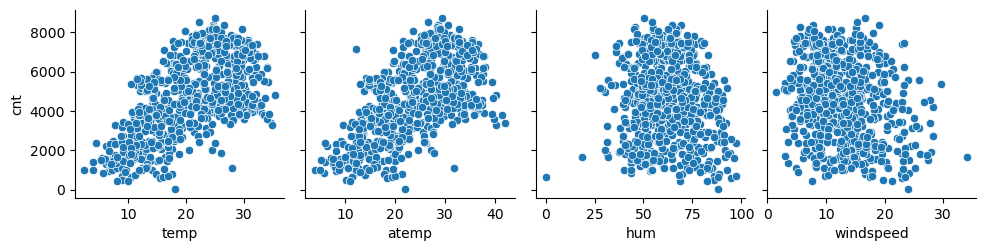

In [1830]:
#visualizing numberic variables
sns.pairplot(x_vars=['temp','atemp','hum','windspeed'], y_vars='cnt', data=data)
plt.show()

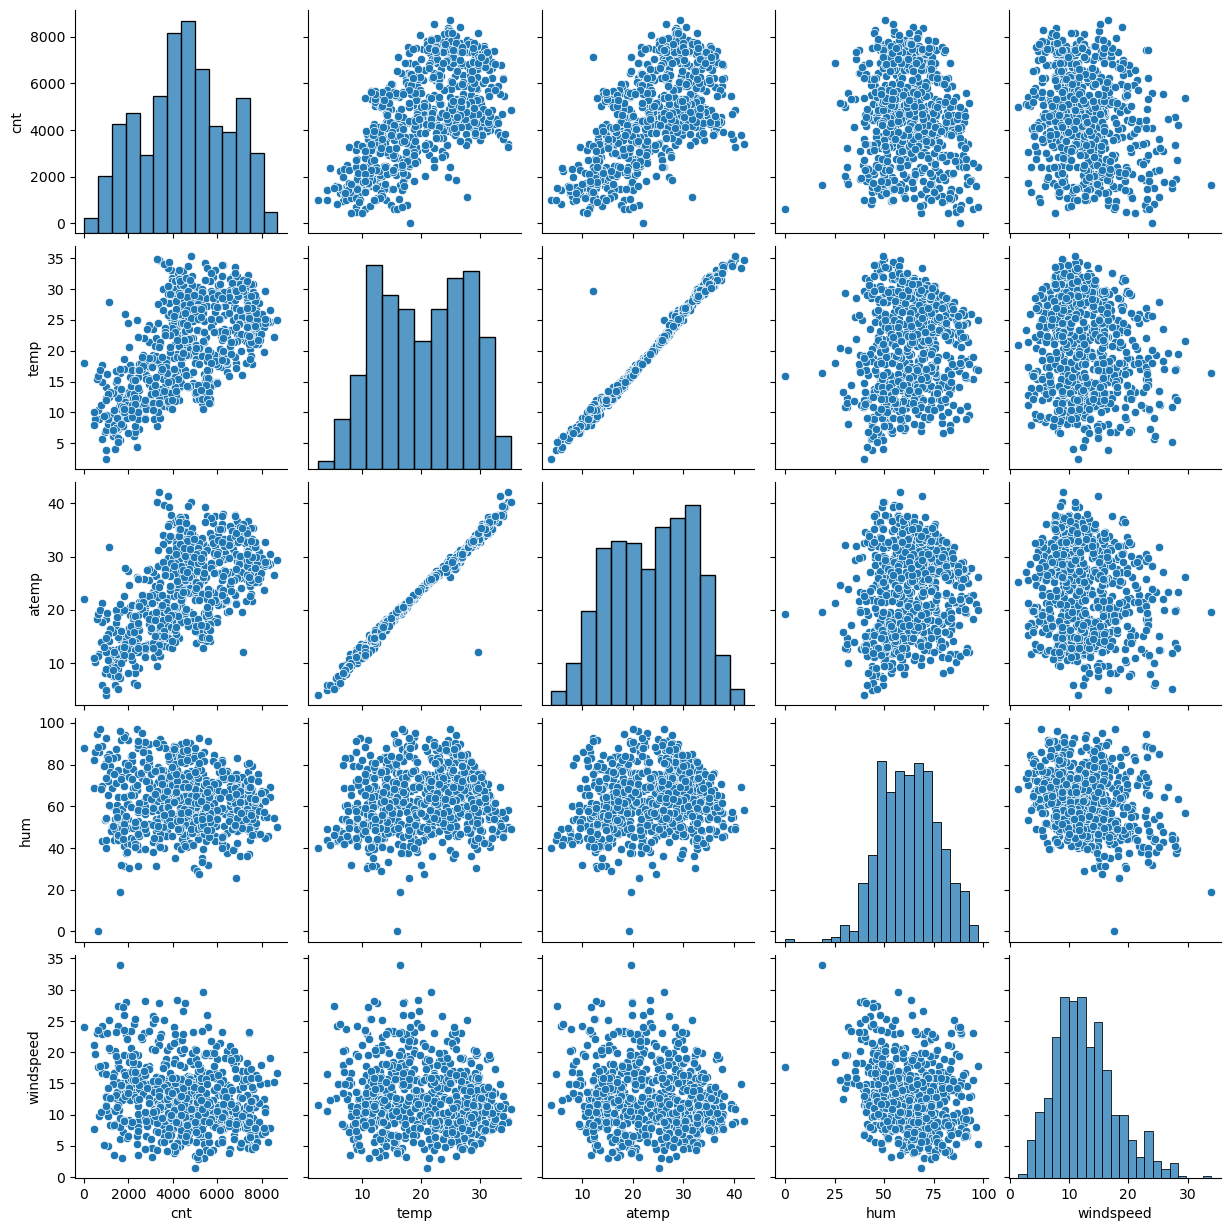

In [1831]:
#visualizing numberic variables
selected_cols = ['cnt','temp','atemp','hum','windspeed']
sns.pairplot(data[selected_cols])
plt.show()

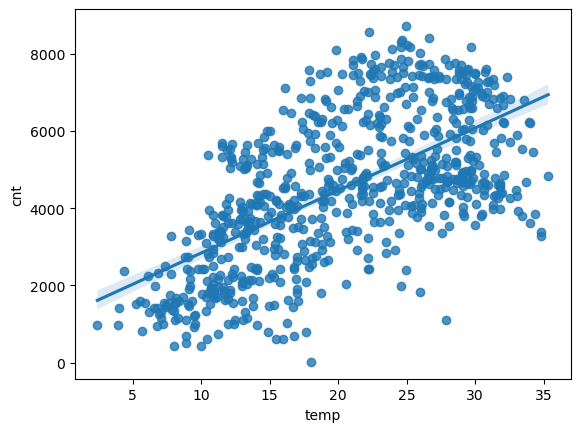

In [1833]:
sns.regplot(x='temp', y='cnt', data=data)
plt.show()

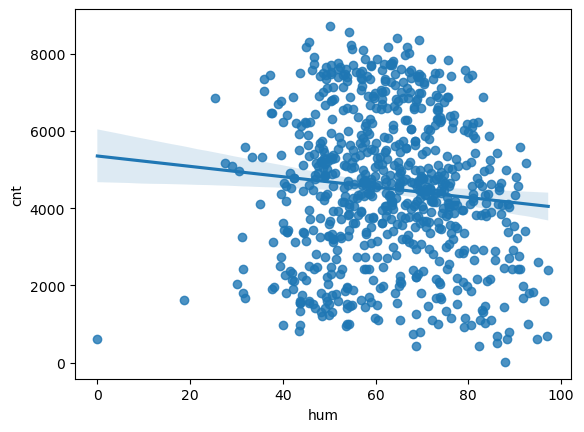

In [1834]:
sns.regplot(x='hum', y='cnt', data=data)
plt.show()

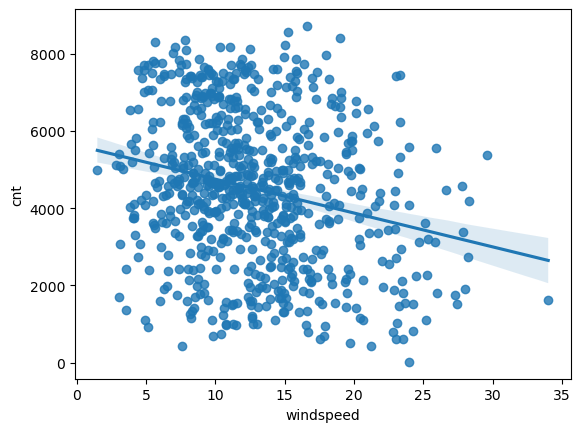

In [1835]:
sns.regplot(x='windspeed', y='cnt', data=data)
plt.show()

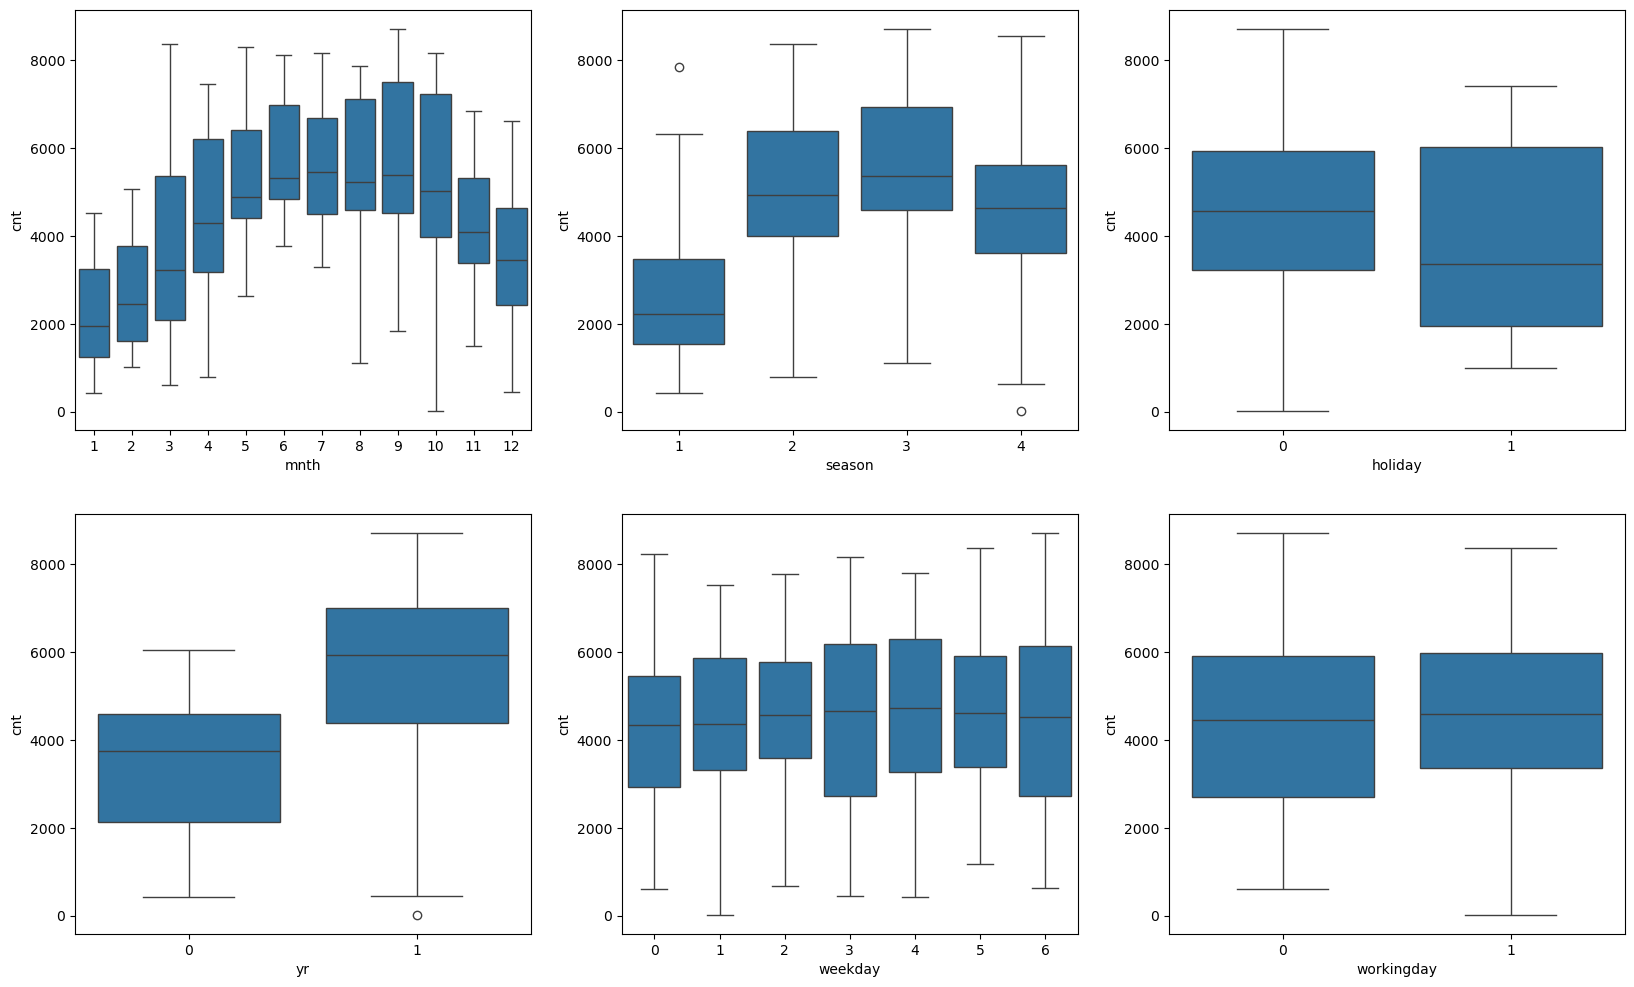

In [1840]:
#visualizing categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'yr', y = 'cnt', data = data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = data)
#plt.subplot(2,3,7)
#sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

</br>

## Step 2: Preparing the data for modelling

#### a) Dropping dteday column from the dataset as it will not be used

In [1845]:
data = data.drop('dteday', axis=1)
data = data.drop('instant', axis=1)
data = data.drop('casual', axis=1)
data = data.drop('registered', axis=1)

#### b) Convert 'weathersit', 'season', 'mnth', 'weekday' from numeric to String. Because numeric values associated with the labels may indicate that there is some order to them - which is actually not the case

#### Column - 'season' mapping
1 -> spring
2 -> summer
3 -> fall
4 -> winter

In [1849]:
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

data['season'] = data['season'].map(season_mapping)

#### Column - 'weathersit' mapping
1 -> Clear
2 -> Cloudy
3 -> Light Rain
4 -> Heavy Rain¶

In [1852]:
weather_mapping = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Light Rain',
    4: 'Heavy Rain'
}

data['weathersit'] = data['weathersit'].map(weather_mapping)

#### Column - 'mnth' mapping
1 -> Jan
2 -> Feb
3 -> Mar
4 -> Apr
5 -> May
6 -> Jun
7 -> Jul
8 -> Aug
9 -> Sep
10 -> Oct
11 -> Nov
12 -> Dec¶

In [1855]:
month_mapping = {
    1: 'Jan',
    2: 'Feb',
    3: 'Mar',
    4: 'Apr',
    5: 'May',
    6: 'Jun',
    7: 'Jul',
    8: 'Aug',
    9: 'Sep',
    10: 'Oct',
    11: 'Nov',
    12: 'Dec'
}

data['mnth'] = data['mnth'].map(month_mapping)

#### Column - 'weekday' mapping
0 -> Mon
1 -> Tue
2 -> Wed
3 -> Thr
4 -> Fri
5 -> Sat
6 -> Sun¶

In [1858]:
day_mapping = {
    0: 'Mon',
    1: 'Tue',
    2: 'Wed',
    3: 'Thr',
    4: 'Fri',
    5: 'Sat',
    6: 'Sun'
}

data['weekday'] = data['weekday'].map(day_mapping)

In [1860]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Sun,0,Cloudy,14.11,18.18,80.58,10.75,985
1,spring,0,Jan,0,Mon,0,Cloudy,14.90,17.69,69.61,16.65,801
2,spring,0,Jan,0,Tue,1,Clear,8.05,9.47,43.73,16.64,1349
3,spring,0,Jan,0,Wed,1,Clear,8.20,10.61,59.04,10.74,1562
4,spring,0,Jan,0,Thr,1,Clear,9.31,11.46,43.70,12.52,1600


#### c) Creating dummy variables for following columns - 

1) mnth
2) season
3) weathersit
4) weekday

In [1863]:
month_df = pd.get_dummies(data['mnth'], drop_first=True)
data = pd.concat([data, month_df], axis=1)
data = data.drop('mnth', axis=1)

In [1865]:
season_df = pd.get_dummies(data['season'], drop_first=True)
data = pd.concat([data, season_df], axis=1)
data = data.drop('season', axis=1)

In [1867]:
weather_df = pd.get_dummies(data['weathersit'], drop_first=True)
data = pd.concat([data, weather_df], axis=1)
data = data.drop('weathersit', axis=1)

In [1869]:
day_df = pd.get_dummies(data['weekday'], drop_first=True)
data = pd.concat([data, day_df], axis=1)
data = data.drop('weekday', axis=1)

In [1871]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Cloudy,Light Rain,Mon,Sat,Sun,Thr,Tue,Wed
0,0,0,0,14.11,18.18,80.58,10.75,985,False,False,...,False,False,True,False,False,False,True,False,False,False
1,0,0,0,14.90,17.69,69.61,16.65,801,False,False,...,False,False,True,False,True,False,False,False,False,False
2,0,0,1,8.05,9.47,43.73,16.64,1349,False,False,...,False,False,False,False,False,False,False,False,True,False
3,0,0,1,8.20,10.61,59.04,10.74,1562,False,False,...,False,False,False,False,False,False,False,False,False,True
4,0,0,1,9.31,11.46,43.70,12.52,1600,False,False,...,False,False,False,False,False,False,False,True,False,False


#### d) Splitting into train and test data set

In [1874]:
#Train - test data split
df_train, df_test = train_test_split(data, train_size=0.70, random_state=100)

In [1876]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


#### d) Rescale the features

In [1879]:
scaler = MinMaxScaler()

numeric_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[numeric_vars] = scaler.fit_transform(df_train[numeric_vars])

In [1881]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Cloudy,Light Rain,Mon,Sat,Sun,Thr,Tue,Wed
576,1,0,1,0.82,0.77,0.73,0.26,0.83,False,False,...,False,False,False,False,False,False,False,False,False,True
426,1,0,0,0.44,0.44,0.64,0.26,0.47,False,False,...,False,False,True,False,False,False,True,False,False,False
728,1,0,0,0.25,0.20,0.50,0.66,0.20,False,True,...,False,False,False,False,True,False,False,False,False,False
482,1,0,0,0.40,0.39,0.50,0.19,0.48,False,False,...,True,False,True,False,False,False,True,False,False,False
111,0,0,1,0.35,0.32,0.75,0.38,0.19,False,False,...,True,False,True,False,False,True,False,False,False,False


## Step 3: Training the Model

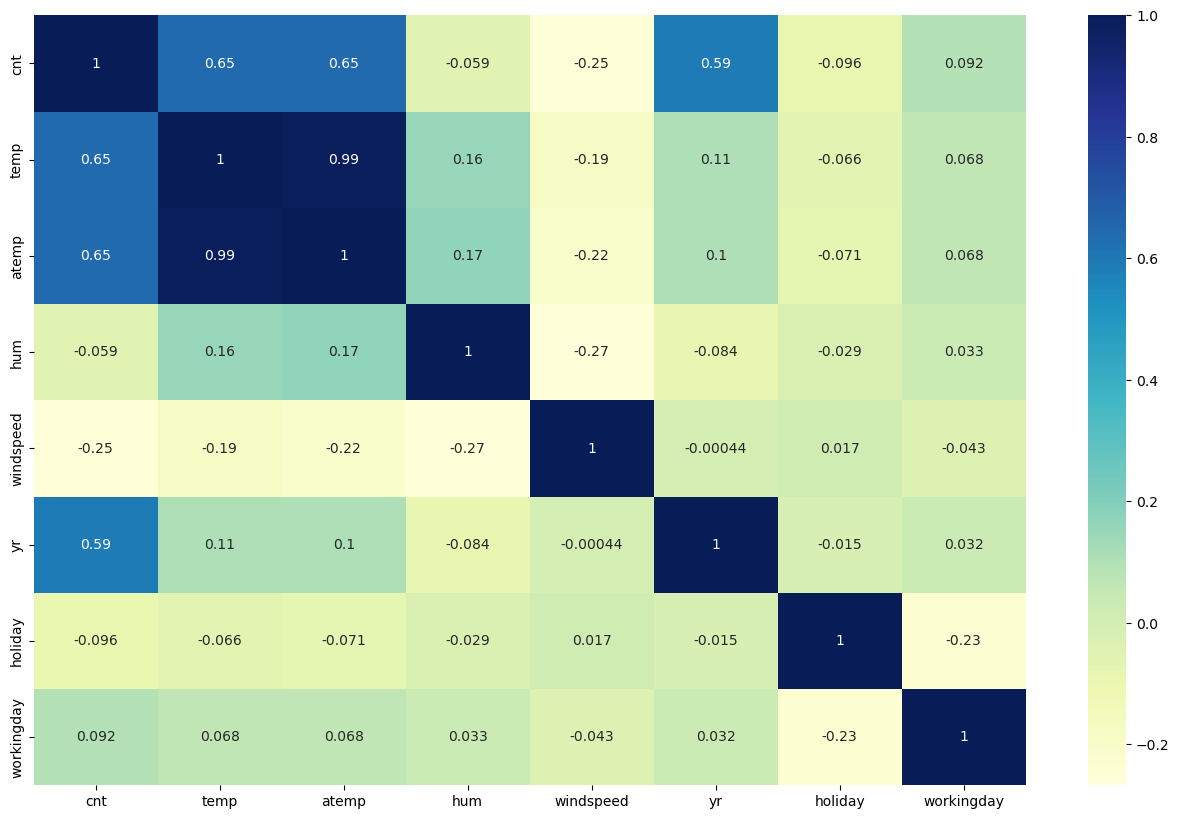

In [1884]:
#heatmap
plt.figure(figsize = (16,10))
selected_cols = ['cnt','temp','atemp','hum','windspeed','yr','holiday','workingday']
sns.heatmap(df_train[selected_cols].corr(), annot= True, cmap='YlGnBu')
plt.show()

#### We will start with feeding all the variables to the model

In [1887]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov',
       'Oct', 'Sep', 'spring', 'summer', 'winter', 'Cloudy', 'Light Rain',
       'Mon', 'Sat', 'Sun', 'Thr', 'Tue', 'Wed'],
      dtype='object')

In [1889]:
y_train = df_train.pop('cnt')
X_train = df_train

In [1891]:
# add a constant
X_train_sm = sm.add_constant(X_train)

#create the model
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit the model
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          2.81e-180
Time:                        23:37:29   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2394      0.035      6.761      0.000       0.170       0.309
yr             0.2325      0.008     28.794      0.000       0.217       0.248
holiday        0.0051      0.024      0.210      0.833      -0.042       0.052
workingday     0.0904      0.012      7.292      0.000       0.066       0.115
temp           0.3880      0.142      2.727      0.007       0.108       0.668
atemp          0.0590      0.138      0.426      0.670      -0.213       0.331
hum           -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed     -0.1836      0.026     -6.962      0.000      -0.235      -0.132
Aug            0.0223      0.034      0.657      0.511      -0.044       0.089
Dec           -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb           -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan           -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul           -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun            0.0060      0.025      0.241      0.810      -0.043       0.055
Mar            0.0016      0.025      0.063      0.950      -0.047       0.050
May            0.0255      0.021      1.208      0.228      -0.016       0.067
Nov           -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
Sep            0.0868      0.032      2.711      0.007       0.024       0.150
spring        -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer         0.0424      0.026      1.617      0.107      -0.009       0.094
winter         0.1071      0.028      3.826      0.000       0.052       0.162
Cloudy        -0.0595      0.010     -5.701      0.000      -0.080      -0.039
Light Rain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Mon            0.0448      0.014      3.239      0.001       0.018       0.072
Sat            0.0097      0.016      0.623      0.534      -0.021       0.040
Sun            0.0991      0.014      7.274      0.000       0.072       0.126
Thr            0.0038      0.015      0.261      0.794      -0.025       0.033
Tue           -0.0119      0.015     -0.785      0.433      -0.042       0.018
Wed           -0.0087      0.015     -0.564      0.573      -0.039       0.022
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11e-51
Kurtosis:                       5.907   Cond. No.                     1.57e+15
==============================================================================

N

#### calculate VIF

In [1894]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values.astype(float), i) for i in range (X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
2,workingday,86.43
3,temp,66.90
4,atemp,56.03
25,Sun,19.71
23,Mon,18.34
18,spring,10.77
20,winter,9.46
19,summer,8.29
15,Nov,6.79
7,Aug,6.47


High p-value, high VIF - drop
High p-value, low VIF - rempve these first
low p-value, high VIF - remove these after
low p-value, low VIF - keep

#### In first iteration we will remove follwoing colummns
1) atemp - as its p-value and VIF both are high
2) Oct - as its p-value and VIF both are high
3) Thr - high p-value
4) Mar - high p-value
5) Jun - high p-value
6) Holiday - high p-value
7) Workingday - high VI
8) Sat - high p-value
9) Sun - high p-value
10) Wed - high p-value
11) Aug - high p-value
12) May - high p-value

In [1898]:
cols_to_drop = ['atemp','Oct','Thr','Mar','Jun','holiday','workingday','Sat','Sun','Wed','Aug','May']
X = X_train.drop(cols_to_drop, axis=1)

In [1900]:
# add a constant
X_train_sm = sm.add_constant(X)

#create the model
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit the model
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     161.5
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          9.89e-189
Time:                        23:37:31   Log-Likelihood:                 519.39
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     492   BIC:                            -926.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3402      0.037      9.318      0.000       0.268       0.412
yr             0.2326      0.008     28.923      0.000       0.217       0.248
temp           0.4531      0.038     11.923      0.000       0.378       0.528
hum           -0.1459      0.038     -3.874      0.000      -0.220      -0.072
windspeed     -0.1892      0.026     -7.391      0.000      -0.240      -0.139
Dec           -0.0501      0.018     -2.746      0.006      -0.086      -0.014
Feb           -0.0382      0.022     -1.776      0.076      -0.080       0.004
Jan           -0.0664      0.021     -3.111      0.002      -0.108      -0.024
Jul           -0.0499      0.018     -2.754      0.006      -0.085      -0.014
Nov           -0.0548      0.019     -2.925      0.004      -0.092      -0.018
Sep            0.0676      0.017      4.035      0.000       0.035       0.100
spring        -0.0554      0.022     -2.527      0.012      -0.098      -0.012
summer         0.0379      0.015      2.474      0.014       0.008       0.068
winter         0.1020      0.018      5.696      0.000       0.067       0.137
Cloudy        -0.0574      0.010     -5.519      0.000      -0.078      -0.037
Light Rain    -0.2548      0.026     -9.689      0.000      -0.306      -0.203
Mon           -0.0477      0.012     -4.138      0.000      -0.070      -0.025
Tue           -0.0257      0.011     -2.285      0.023      -0.048      -0.004
==============================================================================
Omnibus:                       94.609   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.708
Skew:                          -0.878   Prob(JB):                     1.83e-61
Kurtosis:                       6.175   Cond. No.                         21.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1902]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values.astype(float), i) for i in range (X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
0,const,85.86
11,spring,5.69
2,temp,4.74
13,winter,3.84
12,summer,2.82
7,Jan,2.36
3,hum,1.94
6,Feb,1.86
9,Nov,1.79
5,Dec,1.66


#### Removed variable 'Spring' as VIF was high

In [1905]:
cols_to_drop = ['spring']
X = X.drop(cols_to_drop, axis=1)

In [1907]:
# add a constant
X_train_sm = sm.add_constant(X)

#create the model
lr = sm.OLS(y_train, X_train_sm.astype(float))

#fit the model
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     169.4
Date:                Mon, 04 Nov 2024   Prob (F-statistic):          1.75e-188
Time:                        23:37:32   Log-Likelihood:                 516.11
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     493   BIC:                            -926.2
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2918      0.031      9.338      0.000       0.230       0.353
yr             0.2315      0.008     28.675      0.000       0.216       0.247
temp           0.5081      0.031     16.226      0.000       0.447       0.570
hum           -0.1552      0.038     -4.119      0.000      -0.229      -0.081
windspeed     -0.1968      0.026     -7.700      0.000      -0.247      -0.147
Dec           -0.0489      0.018     -2.667      0.008      -0.085      -0.013
Feb           -0.0530      0.021     -2.549      0.011      -0.094      -0.012
Jan           -0.0776      0.021     -3.694      0.000      -0.119      -0.036
Jul           -0.0411      0.018     -2.299      0.022      -0.076      -0.006
Nov           -0.0487      0.019     -2.606      0.009      -0.085      -0.012
Sep            0.0793      0.016      4.902      0.000       0.048       0.111
summer         0.0622      0.012      5.171      0.000       0.039       0.086
winter         0.1306      0.014      9.339      0.000       0.103       0.158
Cloudy        -0.0551      0.010     -5.286      0.000      -0.076      -0.035
Light Rain    -0.2500      0.026     -9.479      0.000      -0.302      -0.198
Mon           -0.0475      0.012     -4.102      0.000      -0.070      -0.025
Tue           -0.0248      0.011     -2.193      0.029      -0.047      -0.003
==============================================================================
Omnibus:                       87.991   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.052
Skew:                          -0.855   Prob(JB):                     4.08e-51
Kurtosis:                       5.828   Cond. No.                         18.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1909]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values.astype(float), i) for i in range (X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

vif

,Features,VIF
0,const,62.21
2,temp,3.18
12,winter,2.32
7,Jan,2.26
3,hum,1.92
9,Nov,1.76
6,Feb,1.72
11,summer,1.71
5,Dec,1.66
13,Cloudy,1.56


## Step 4: Residual Analysis

In [1912]:
y_train_pred = lr_model.predict(X_train_sm)

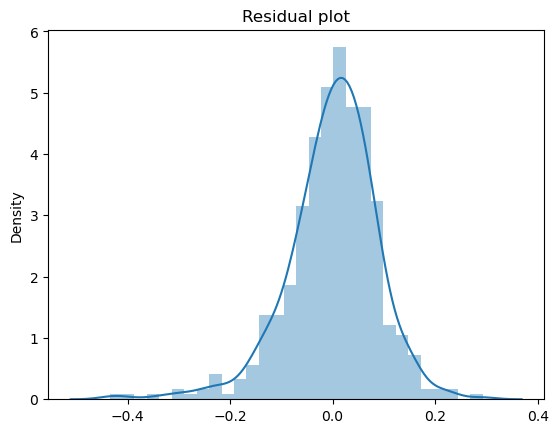

In [1914]:
res = y_train - y_train_pred
sns.distplot(res)
plt.title('Residual plot')
plt.show()

## Step 5: Predection and evaluation of test set

In [1917]:
numeric_vars = ['temp','atemp','hum','windspeed','cnt']
df_test[numeric_vars] = scaler.transform(df_test[numeric_vars])

In [1919]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.00,220.00,220.00,220.00,220.00,220.00,220.00,220.00
mean,0.48,0.04,0.70,0.56,0.53,0.64,0.31,0.52
std,0.50,0.19,0.46,0.23,0.22,0.15,0.16,0.22
min,0.00,0.00,0.00,0.05,0.03,0.26,-0.04,0.05
25%,0.00,0.00,0.00,0.36,0.34,0.53,0.20,0.38
50%,0.00,0.00,1.00,0.56,0.54,0.63,0.30,0.52
75%,1.00,0.00,1.00,0.76,0.71,0.74,0.40,0.68
max,1.00,1.00,1.00,0.98,0.98,1.00,0.81,0.96


In [1921]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1923]:
#add constant
X_test_sm = sm.add_constant(X_test)

In [1925]:
#drop cols from test set also
cols_to_drop = ['atemp','Oct','Thr','Mar','Jun','holiday','workingday','Sat','Sun','Wed','Aug','May','spring']
X_test_sm = X_test_sm.drop(cols_to_drop, axis=1)

In [1927]:
#predict
y_test_pred = lr_model.predict(X_test_sm)

## Model Evaluation

In [1930]:
#evaluate
#evaluate model r-squared on test
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.8195713466043723

## Conclusion

#### Major Factors that impact bike demand - 

1) temp
2) windspeed
3) Winter season
4) Rain
5) humidity

